# Recommender Systems

#### The library surprise is already installed in the anaconda base environment. if it's not installed use pip or conda to install surprise before running the following notebook
!pip install scikit-surprise

## Loading the data and performing the required operations

### Import the necessary library

In [1]:
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import seaborn as sns

### Load the necessary data

In [2]:
df1=pd.read_csv('phone_user_review_file_1.csv', encoding='latin1')
df2=pd.read_csv('phone_user_review_file_2.csv', encoding='latin1')
df3=pd.read_csv('phone_user_review_file_3.csv', encoding='latin1')
df4=pd.read_csv('phone_user_review_file_4.csv', encoding='latin1')
df5=pd.read_csv('phone_user_review_file_5.csv', encoding='latin1')
df6=pd.read_csv('phone_user_review_file_6.csv', encoding='latin1')

#### The shape of each file is printed below

In [3]:
print('Shape of Review file 1', df1.shape)
print('Shape of Review file 2', df2.shape)
print('Shape of Review file 3', df3.shape)
print('Shape of Review file 4', df4.shape)
print('Shape of Review file 5', df5.shape)
print('Shape of Review file 6', df6.shape)


Shape of Review file 1 (374910, 11)
Shape of Review file 2 (114925, 11)
Shape of Review file 3 (312961, 11)
Shape of Review file 4 (98284, 11)
Shape of Review file 5 (350216, 11)
Shape of Review file 6 (163837, 11)


### Merging the dataframes into a single dataframe 

In [4]:
frames=[df1,df2,df3,df4,df5,df6]

In [5]:
df=pd.concat(frames)

In [6]:
print('Shape of final review file',df.shape)

Shape of final review file (1415133, 11)


In [7]:
df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
df.tail(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
163836,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


### Rounding off the ratings (score)

In [9]:
df[['score']]=df[['score']].round()
df[['score_max']]=df[['score_max']].round()

In [10]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Checking for duplicates, missing values and removing them

In [11]:
df.isna().any().any()

True

In [12]:
df.loc[:, df.isnull().any()].columns

Index(['score', 'score_max', 'extract', 'author', 'product'], dtype='object')

In [13]:
df.isnull().any(axis = 1).sum()

139216

In [14]:
df[df.isnull().any(axis=1)]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
270,/cellphones/samsung-galaxy-s8/,5/4/2017,cs,cz,CZC,czc.cz,10.0,10.0,"RozhodnÄ nejlepÅ¡Ã­ smartphone pro rok 2017, ...",NaN,"Samsung Galaxy S8, 64GB, ÄernÃ¡"
456,/cellphones/samsung-galaxy-s8/,4/25/2017,cs,cz,CZC,czc.cz,10.0,10.0,Samsung Galaxy S8 G950F 64GB â ÃVOD V posle...,NaN,"Samsung Galaxy S8, 64GB, ÄernÃ¡"
489,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð²ÑÐµ Ð½ÑÐ°Ð²Ð¸ÑÑÑ, Ð½Ðµ Ð¿Ð¾Ð»ÑÐ·Ð¾Ð²Ð°...",ÐÐ¼Ð¸ÑÑÐ¸Ð¹ Ð¡ÐµÑÐ³ÐµÐµÐ²,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
490,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"Ð´Ð¾ÑÐ¾Ð³Ð¾Ð¹ Ð±ÑÐ´Ð¶ÐµÑÐ½Ð¸Ðº, Ð½Ðµ Ð´Ð»Ñ...",ÐÐ°Ð´ÐµÐ¶Ð´Ð°,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
491,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,2300 Ð¼Ð¸Ð»Ð»Ð¸Ð°Ð¼Ð¿ÐµÑ Ð² Ð±Ð°ÑÐ°ÑÐµÐµ â...,ÐÐ°ÑÐ²ÐµÐ¹ Ð.,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
492,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÑÐ´Ñ ÐºÑÐ°ÑÐ¾Ðº: Ð² ÑÐ¾Ð½Ð¸ ÑÐ¾ÑÐ²Ð¾Ñ...,ÐÐ°Ð²ÐµÐ» Ð,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
493,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÐ¾ÐºÑÐ¿Ð°Ð» ÑÐµÐ»ÐµÑÐ¾Ð½ ÑÐ¾Ð»ÑÐºÐ¾ Ð¸Ð...,ÐÐ³Ð¾ÑÑ,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
494,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÐµ ÑÐµÐºÐ¾Ð¼ÐµÐ½Ð´ÑÑ ÐÐ°ÑÑÑÐ¾Ð¹ÐºÐ°Ð¼...,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
495,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,ÐÐµ ÑÑÐ¾Ð¸Ñ ÑÐ²Ð¾Ð¸Ñ Ð´ÐµÐ½ÐµÐ³. ÐÐ°Ð¼Ð...,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)
496,/cellphones/samsung-galaxy-s8/,4/15/2017,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,NaN,NaN,"ÐÐ¾ÑÑÐ¾Ð¹Ð½ÑÐ¹ Ð¿ÑÐµÐµÐ¼Ð½Ð¸Ðº XA, Ð»Ð¸Ñ...",ÐÑÐ¾Ñ Ð¾ÑÐ¾Ð²ÐÐ¸ÐºÐ¸ÑÐ°,Samsung Galaxy S8 (Ð¶ÐµÐ»ÑÑÐ¹ ÑÐ¾Ð¿Ð°Ð·)


In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isna().any().any()

False

In [17]:
df[df.duplicated()]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
3719,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
3720,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
3824,/cellphones/samsung-galaxy-s6-edgeplus/,9/30/2015,en,in,Amazon,amazon.in,8.0,10.0,Samsung Galaxy S6 Edge Plus features: --Androi...,rdgreat,"Samsung Galaxy S6 Edge Plus (32GB, Gold Platinum)"
3825,/cellphones/samsung-galaxy-s6-edgeplus/,9/30/2015,en,in,Amazon,amazon.in,8.0,10.0,Samsung Galaxy S6 Edge Plus features: --Androi...,rdgreat,"Samsung Galaxy S6 Edge Plus (32GB, Gold Platinum)"
4431,/cellphones/samsung-galaxy-s6-edgeplus/,8/23/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,Samsung Galaxy S6 Edge + Plus G928C 32GB Gold ...


In [18]:
df.duplicated().sum()

4480

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

### Selecting 1000000 random samples from full datasets

In [21]:
df1=df.sample(n=1000000,random_state=612)

In [22]:
df1.shape

(1000000, 11)

In [23]:
print('Presence of Nan values:', df1.isna().any().any())
print('Presence of duplicate rows:',df1.duplicated().sum())

Presence of Nan values: False
Presence of duplicate rows: 0


#### There are no duplicate or Nan values in the new dataframe

In [24]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
20276,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,10.0,10.0,Good product in this price...,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
104794,/cellphones/samsung-galaxy-s6/,11/10/2016,es,es,Samsung,samsung.com,8.0,10.0,"En general me gusta mucho mi nuevo S6, el reco...",Evyta,Samsung Galaxy S6
321393,/cellphones/sony-ericsson-k810i/,1/3/2010,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð½ÐµÑÐ¼Ð¾ÑÑÑ Ð½Ð° Ð½ÐµÐ´Ð¾ÑÑÐ°ÑÐºÐ¸ Ð² ...,VanRaZor,Sony Ericsson K810i
78000,/cellphones/sony-xperia-z2/,7/19/2014,ru,ua,Hotline.ua,hotline.ua,6.0,10.0,ÐÑÑÑ ÑÐ¶Ðµ ÑÐ°Ð·Ð²ÐµÑÐ½ÑÑÑÐ¹ Ð¾ÑÐ·Ñ...,ruga,Sony Xperia Z2 (Black)
16933,/cellphones/samsung-galaxy-s7-edge/,10/21/2016,de,de,Otto.de,otto.de,10.0,10.0,Ein Wahnsinns Handy! Macht richtig schÃ¶ne Bil...,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."


## Number of users with high reviews

In [25]:
df2 = pd.DataFrame(df1.groupby('author')['score'].count().sort_values(ascending=False))

In [26]:
print('The users with highest number of reviews')
df2.head(10)

The users with highest number of reviews


,score
author,
Amazon Customer,60408
Cliente Amazon,15051
e-bit,6651
Client d'Amazon,6087
Amazon Kunde,3683
Anonymous,2096
einer Kundin,2065
einem Kunden,1452
unknown,1350


### No of users and products that have over 50 reviews

In [27]:
df3=df1.copy(deep = True )

In [28]:
df3=df3.drop('score_max',axis=1)

In [29]:
df3=df3.drop('extract',axis=1)

In [30]:
df3=df3.drop('score',axis=1)

In [31]:
df3.shape

(1000000, 8)

In [32]:
x=pd.Series(np.linspace(0,999999,1000000)).astype(int)

In [33]:
df3=df3.set_index(x)

In [34]:
df3['userid'] = df3.groupby(['author']).ngroup()
df3['productid'] = df3.groupby(['product']).ngroup()

In [35]:
df3['user_count']=df3['userid'].value_counts()
df3['product_count']=df3['productid'].value_counts()

In [36]:
df3.head()

,phone_url,date,lang,country,source,domain,author,product,userid,productid,user_count,product_count
0,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)",196083,20587,1.0,1.0
1,/cellphones/samsung-galaxy-s6/,11/10/2016,es,es,Samsung,samsung.com,Evyta,Samsung Galaxy S6,118118,37781,1.0,1.0
2,/cellphones/sony-ericsson-k810i/,1/3/2010,ru,ru,Yandex,market.yandex.ru,VanRaZor,Sony Ericsson K810i,388052,44103,1.0,1.0
3,/cellphones/sony-xperia-z2/,7/19/2014,ru,ua,Hotline.ua,hotline.ua,ruga,Sony Xperia Z2 (Black),557947,46907,1.0,1.0
4,/cellphones/samsung-galaxy-s7-edge/,10/21/2016,de,de,Otto.de,otto.de,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",455976,38657,1.0,37.0


In [37]:
df4=df3[ (df3['user_count']> 50) & (df3['product_count'] > 50)]

In [38]:
df4

,phone_url,date,lang,country,source,domain,author,product,userid,productid,user_count,product_count
2968,/cellphones/samsung-galaxy-s5/,3/3/2015,en,us,Rakuten,rakuten.com,Myron A Schwab,Samsung Galaxy S5 G900A 4G LTE 16GB Unlocked G...,269857,37540,246.0,77.0
3115,/cellphones/wiko-rainbow/,6/10/2015,de,de,Amazon,amazon.de,PC-DIDI,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",289145,48960,72.0,477.0
13594,/cellphones/samsung-galaxy-s6/,1/7/2016,es,es,Amazon,amazon.es,Isaac,Samsung Galaxy S6 - Smartphone libre Android (...,163742,37808,103.0,52.0
24176,/cellphones/lg-lg420g/,12/19/2006,en,us,Amazon,amazon.com,Rob Oppen,LG 420G Pre-Paid Cell Phone for TracFone with ...,322089,15847,55.0,55.0
24287,/cellphones/lg-arena-km900/,7/25/2011,es,ar,MercadoLibre,opinion.mercadolibre.com.ar,JOSEEDUARDO.BUSTOS,LG KM900,170666,17944,412.0,71.0
28449,/cellphones/samsung-galaxy-a5-2016/,6/15/2016,it,it,Amazon,amazon.it,Flora,"Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero",126297,34318,171.0,61.0
29072,/cellphones/motorola-moto-g4/,12/11/2016,de,de,Amazon,amazon.de,Hr. Sieb,"Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 1...",157903,20196,66.0,240.0
48485,/cellphones/lg-vs750/,6/9/2011,en,us,Amazon,amazon.com,"G. Yau ""TY""",LG Fathom VS750 Verizon phone Unlocked GSM Wor...,131969,16794,63.0,106.0


In [39]:
print('Shape of dataframe consisting of products that have number of ratings greater than 50 and author who have reviewed more than 50 items:', df4.shape)

Shape of dataframe consisting of products that have number of ratings greater than 50 and author who have reviewed more than 50 items: (8, 12)


## Popularity based recommender system

### Dropping all unnecessary features

In [40]:
df1=df1[['score','score_max','extract','author','product']]

In [41]:
df2 = pd.DataFrame(df1.groupby('product')['score'].mean()) 

In [42]:
df2['rating_counts'] = pd.DataFrame(df1.groupby('product')['score'].count())  

### Top 5 products with highest ratings based on Popularity based recommender systems

In [43]:
df2.head()

,score,rating_counts
product,,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.000000,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.000000,1
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.513514,37


## Collaborative Filtering recommender system

In [44]:
df2=df1.copy(deep=True)

#### First we have to convert dataframe to a format that can be read by 'surprise' library

In [45]:
df2=df2[['author','product','score']]

In [46]:
df2.head()

,author,product,score
20276,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)",10.0
104794,Evyta,Samsung Galaxy S6,8.0
321393,VanRaZor,Sony Ericsson K810i,8.0
78000,ruga,Sony Xperia Z2 (Black),6.0
16933,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10.0


In [47]:
df2.shape

(1000000, 3)

#### Limiting the datasets to 5000 to avoid running out of memory issue

In [48]:
df2=df2.sample(n=5000,random_state=612)

In [49]:
x=pd.Series(np.linspace(0,4999,5000))

In [50]:
x=x.astype(int)

In [51]:
df2=df2.set_index([x])

In [52]:
df2[['score']]=df2[['score']].astype(int)

In [53]:
df2.head()

,author,product,score
0,amit kumar gupta,InFocus M810 (Gold),10
1,oscar,Sony Xperia L - Smartphone libre Android (pant...,10
2,kookie,"Samsung Galaxy S4, Brown 16GB (Verizon Wireless)",8
3,e-bit,Smartphone Asus ZenFone 3 ZE520KL,10
4,Sarah Schanz,"5,0 Zoll CUBOT S208 IPS OGS Screen 3G Android ...",8


#### (Optional) Assigning unique ids to each user and product and avoiding their actual names

In [54]:
df2['userid'] = df2.groupby(['author']).ngroup()

In [55]:
df2['productid'] = df2.groupby(['product']).ngroup()

In [56]:
df2.head()

,author,product,score,userid,productid
0,amit kumar gupta,InFocus M810 (Gold),10,2957,1046
1,oscar,Sony Xperia L - Smartphone libre Android (pant...,10,3783,3452
2,kookie,"Samsung Galaxy S4, Brown 16GB (Verizon Wireless)",8,3532,2778
3,e-bit,Smartphone Asus ZenFone 3 ZE520KL,10,3204,3214
4,Sarah Schanz,"5,0 Zoll CUBOT S208 IPS OGS Screen 3G Android ...",8,2446,3


#### Checking whether it works properly

In [57]:
df2['author'].value_counts()

Amazon Customer              315
Cliente Amazon                81
e-bit                         26
Client d'Amazon               22
Amazon Kunde                  21
Anonymous                     16
einer Kundin                  10
einem Kunden                   8
ÐÐ½Ð´ÑÐµÐ¹                   6
Marco                          6
Alex                           6
unknown                        6
AnÃ´nimo                       6
Paul                           4
Kevin                          4
Alberto                        4
Antonio                        4
Laura                          4
Bezlikiy_Djo                   4
Mike                           4
ÐÐ¼Ð¸ÑÑÐ¸Ð¹                 4
ÐÐ°ÐºÑÐ¸Ð¼                   4
Fabrizio                       3
Andrea                         3
ÐÐ°ÑÑÑ                     3
Julia                          3
Carlos                         3
Ivan                           3
ÐÐ²Ð³ÐµÐ½Ð¸Ð¹                 3
Harry                          3
          

#### As we can see here only few users have rated many items and 90 percent of them have rated less than 5 items

### Format conversion and creating a collaborative filtering model

### Item-based recommender system

In [58]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df2[['userid', 'productid', 'score']], reader)

In [59]:
trainset, testset = train_test_split(data, test_size=.30)

In [60]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [61]:
test_pred = algo.test(testset)

#### RMSE value for item based collaborative filter recommender system

In [62]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.5461


2.5460767138587572

#### Predictions

In [63]:
test_pred

[Prediction(uid=2579, iid=3603, r_ui=8.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=683, iid=3492, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=648, iid=620, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=130, iid=2782, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=4025, iid=2533, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1516, iid=2683, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=4112, iid=2134, r_ui=4.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Pred

### User based recommender system

In [64]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [65]:
test_pred = algo.test(testset)

#### RMSE value for user based collaborative filter recommender system

In [66]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 2.5331


2.533106486227745

#### Predictions

In [67]:
test_pred

[Prediction(uid=2579, iid=3603, r_ui=8.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=683, iid=3492, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=648, iid=620, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=130, iid=2782, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=4025, iid=2533, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=1516, iid=2683, r_ui=10.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=4112, iid=2134, r_ui=4.0, est=7.980857142857142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Pred

## SVD based recommender system

In [68]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df2[['author', 'product', 'score']], reader)

In [69]:
trainset, testset = train_test_split(data, test_size=.30)

In [70]:
algo = SVD()
algo.fit(trainset)

In [71]:
test_pred = algo.test(testset)

#### RMSE value for SVD based recommender system

In [72]:
print("SVD-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD-based Model : Test Set
RMSE: 2.5563


2.556346235668593

#### Predictions

In [73]:
test_pred

[Prediction(uid='Bath Tubs Outlet Shop', iid='Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria Interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Argento', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Dianask8', iid='Nokia N8', r_ui=8.0, est=8.20096846355097, details={'was_impossible': False}),
 Prediction(uid='Nazeer Ahamed', iid='Sony Xperia Z1 (White, 16GB)', r_ui=8.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Laurie K.', iid='Samsung U380 Brightside 3G Verizon CDMA Smartphone - Black', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Udaypreet', iid='Motorola Moto G', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Francisco J. Luque G.', iid='Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty)', r_ui=10.0, est=8.190255397923165, details={'was_impossible': False}

### Using cross validation along with SVD

In [74]:
algo2=SVD()

In [75]:
cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5477  2.5894  2.5923  2.6190  2.5420  2.5781  0.0291  
MAE (testset)     1.9972  1.9966  2.0179  2.0302  1.9703  2.0024  0.0205  
Fit time          0.28    0.25    0.26    0.26    0.26    0.26    0.01    
Test time         0.01    0.01    0.01    0.01    0.00    0.01    0.00    


{'test_rmse': array([2.54767407, 2.58936879, 2.59232155, 2.61902912, 2.54199291]),
 'test_mae': array([1.99716112, 1.99662767, 2.01785625, 2.03017081, 1.97031018]),
 'fit_time': (0.2800107002258301,
  0.24902582168579102,
  0.264972448348999,
  0.2649993896484375,
  0.25700950622558594),
 'test_time': (0.0060002803802490234,
  0.0069997310638427734,
  0.008003473281860352,
  0.006000041961669922,
  0.0049855709075927734)}

### Using Gridsearch CV to find the best parameteres for SVD

In [76]:
param_grid = {'n_epochs': [5, 10, 15, 20], 'lr_all': [0.002, 0.005, 0.007, 0.009, 0.01],
              'reg_all': [0.2, 0.4, 0.6, 0.8, 1.0]}

In [77]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

In [78]:
gs.fit(data)

In [79]:
print(gs.best_score['rmse'])

2.567121862507231


### Best parameters

In [80]:
print(gs.best_params['rmse'])

{'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.4}


### Using the best parameters in SVD algorithm

In [81]:
algo_final=SVD(n_epochs=10, lr_all=0.007, reg_all=0.4)

In [82]:
algo_final.fit(trainset)

In [83]:
test_pred = algo_final.test(testset)

In [84]:
print("SVD-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD-based Model : Test Set
RMSE: 2.5470


2.5469929031684795

### Predictions

In [85]:
test_pred

[Prediction(uid='Bath Tubs Outlet Shop', iid='Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria Interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Argento', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Dianask8', iid='Nokia N8', r_ui=8.0, est=8.15782653657538, details={'was_impossible': False}),
 Prediction(uid='Nazeer Ahamed', iid='Sony Xperia Z1 (White, 16GB)', r_ui=8.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Laurie K.', iid='Samsung U380 Brightside 3G Verizon CDMA Smartphone - Black', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Udaypreet', iid='Motorola Moto G', r_ui=10.0, est=8.050571428571429, details={'was_impossible': False}),
 Prediction(uid='Francisco J. Luque G.', iid='Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty)', r_ui=10.0, est=8.16691030393088, details={'was_impossible': False})

### Using CV with best parameters

In [86]:
cross_validate(algo_final, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.3849  2.6841  2.7707  2.5692  2.4996  2.3367  2.4149  2.5882  2.6475  2.6884  2.5584  0.1379  
MAE (testset)     1.8451  2.0859  2.1666  2.0340  1.9186  1.8657  1.8691  1.9832  2.0702  2.1290  1.9967  0.1113  
Fit time          0.17    0.16    0.16    0.17    0.16    0.17    0.16    0.18    0.18    0.17    0.17    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([2.384914  , 2.68410639, 2.77069483, 2.56919008, 2.49956929,
        2.33666023, 2.41485309, 2.5881614 , 2.64745026, 2.68843711]),
 'test_mae': array([1.84510233, 2.08588748, 2.16661477, 2.03402839, 1.91856243,
        1.86567958, 1.8690773 , 1.98318211, 2.07022468, 2.1289656 ]),
 'fit_time': (0.16803216934204102,
  0.16196322441101074,
  0.15601253509521484,
  0.16500020027160645,
  0.15997076034545898,
  0.16503524780273438,
  0.16001653671264648,
  0.17899560928344727,
  0.17899298667907715,
  0.16602492332458496),
 'test_time': (0.0029909610748291016,
  0.0030007362365722656,
  0.002984285354614258,
  0.0029997825622558594,
  0.002998828887939453,
  0.0019943714141845703,
  0.0030028820037841797,
  0.00299835205078125,
  0.0030319690704345703,
  0.0020003318786621094)}

## Check for outliers

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='score'>

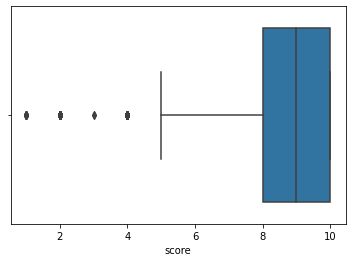

In [87]:
sns.boxplot(df2['score'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='score', ylabel='count'>

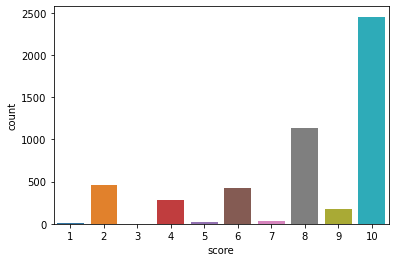

In [88]:
sns.countplot(df2['score'])

#### Outliers exist but when comapred to the total data set, they exist only in small quantities

## Inference

#### Among all the three models of recommendation systems, SVD tends to have lower RMSE values when compared to collborative filtering based recommendation system. Both item_ based and user_based are suffering from cold start and grey sheep problem respectively. Though the original dataset is big, we had to select only 5000 data points to avoid running out of memory. This had impacted us directly. Like I mentioned earlier while checking how many different items each author has reviewed only few  have reviewed multiple items while most of them have only rated only one item, this makes it much harder for collaborative filtering to recommend correctly and hence the high error and also most of the test predictions had was_impossible tag set True and only few were false. Well SVD too has a large RMSE value but it never had was_impossible tag: True on test predictions. In cases like these popularity based recommendation system is better.   

# Questions

## Business scenarios where we can use popularity based recommendation system 

#### When a new customer subscribe to our service we can use popularity based recommendation system. To recommend a particular product to a person previous data about them is necessary, it is the core product for recommendation systems. Since we don't have previous information about them we can use popularity based recommendation system which displays or recommends the latest prodructs that are in trend at that time. Initially this will work good till we gain some more insights about the preferences and tastes of the customer. This popularity recommendation systems doesn't need any information about the user. 

### Business scenarios where we can use collaborative filtering based recommendation system.

#### When we already have information on a set of customers, we can use collaborative filtering recommendation system. This system finds similarity between customers based on the products they have rated.

### How to improve?

#### While using collaborative filtering methods, we tend to suffer from gray sheep and cold start problems, to avoid this it is better use a hybrid recommendation system to improve the recommendations